In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry_convert as pc
from sklearn import preprocessing
sns.set(rc={'figure.figsize':(18, 3)})

In [12]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Using cleaned datasets

In [16]:
raw = pd.read_csv('datasets_cleaned/crops_cleaned.csv')
prices = pd.read_csv('datasets_cleaned/producer_prices_cleaned.csv')
caffeinePrices = pd.read_csv('datasets_cleaned/caffeine_prices_clean.csv')
rainfall = pd.read_csv('datasets_cleaned/rainfall_clean.csv')
temperatures = pd.read_csv('datasets_cleaned/temperatures_clean.csv')

### Normalization

In [17]:

prices_melted = pd.melt(prices, id_vars=['Item'], value_vars=prices.columns[9:], value_name='Price')

In [18]:
#Min-max normalization
rawProductionNormalized = raw.copy()[raw['Element'] == 'Production']
min_max_scaler = preprocessing.MinMaxScaler()
column_names_to_normalize = rawProductionNormalized.columns[3:]
x = rawProductionNormalized[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = rawProductionNormalized.index)
rawProductionNormalized[column_names_to_normalize] = df_temp
rawProductionNormalized

Area  \
2                                  Afghanistan   
5                                  Afghanistan   
8                                  Afghanistan   
11                                 Afghanistan   
14                                 Afghanistan   
...                                        ...   
50238  Net Food Importing Developing Countries   
50241  Net Food Importing Developing Countries   
50244  Net Food Importing Developing Countries   
50247  Net Food Importing Developing Countries   
50250  Net Food Importing Developing Countries   

                                   Item     Element    1961    1962    1963  \
2                   Almonds, with shell  Production     nan     nan     nan   
5      Anise, badian, fennel, coriander  Production     nan     nan     nan   
8                                Apples  Production 0.00002 0.00002 0.00002   
11                             Apricots  Production 0.00004 0.00003 0.00003   
14                               Barley  Production 0.00043 0.00040 0.00040   
...                                 ...         ...     ...     ...     ...   
50238                     Pulses, Total  Production 0.00550 0.00569 0.00576   
50241           Roots and Tubers, Total  Production 0.04099 0.03954 0.03937   
50244               Sugar Crops Primary  Production 0.13897 0.11437 0.11466   
50247                   Treenuts, Total  Production 0.00029 0.00032 0.00033   
50250                Vegetables Primary  Production 0.01420 0.01395 0.01429   

         1964    1965    1966    1967  ...    2009    2010    2011    2012  \
2         nan     nan     nan     nan  ... 0.00002 0.00002 0.00002 0.00002   
5         nan     nan     nan     nan  ... 0.00000 0.00000 0.00000 0.00000   
8     0.00002 0.00002 0.00002 0.00002  ... 0.00003 0.00002 0.00002 0.00003   
11    0.00004 0.00004 0.00004 0.00005  ... 0.00002 0.00003 0.00003 0.00003   
14    0.00038 0.00038 0.00035 0.00032  ... 0.00020 0.00018 0.00012 0.00020   
...       ...     ...     ...     ...  ...     ...     ...     ...     ...   
50238 0.00569 0.00570 0.00519 0.00507  ... 0.00710 0.00779 0.00769 0.00816   
50241 0.03810 0.04000 0.03680 0.03713  ... 0.05708 0.06270 0.06348 0.07101   
50244 0.11184 0.12954 0.11563 0.12538  ... 0.07915 0.07853 0.07740 0.08138   
50247 0.00035 0.00034 0.00031 0.00028  ... 0.00054 0.00056 0.00063 0.00065   
50250 0.01427 0.01458 0.01428 0.01387  ... 0.02871 0.02935 0.02842 0.02930   

         2013    2014    2015    2016    2017    2018  
2     0.00002 0.00001 0.00001 0.00001 0.00001 0.00001  
5     0.00000 0.00001 0.00001 0.00001 0.00001 0.00001  
8     0.00003 0.00003 0.00003 0.00005 0.00006 0.00007  
11    0.00003 0.00003 0.00003 0.00001 0.00004 0.00001  
14    0.00019 0.00018 0.00014 0.00010 0.00003 0.00002  
...       ...     ...     ...     ...     ...     ...  
50238 0.00828 0.00803 0.00830 0.00792 0.00791 0.00830  
50241 0.06850 0.06572 0.06676 0.06409 0.06180 0.06319  
50244 0.08084 0.07951 0.07947 0.07908 0.07921 0.07623  
50247 0.00064 0.00065 0.00073 0.00066 0.00069 0.00075  
50250 0.02736 0.02838 0.02914 0.02810 0.02725 0.02857  

[17196 rows x 61 columns]

In [19]:
rawYieldNormalized = raw.copy()[raw['Element'] == 'Yield']
min_max_scaler = preprocessing.MinMaxScaler()
column_names_to_normalize = raw.columns[3:]
x = raw[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = raw.index)
rawYieldNormalized[column_names_to_normalize] = df_temp
rawYieldNormalized

Area  \
1                                  Afghanistan   
4                                  Afghanistan   
7                                  Afghanistan   
10                                 Afghanistan   
13                                 Afghanistan   
...                                        ...   
50237  Net Food Importing Developing Countries   
50240  Net Food Importing Developing Countries   
50243  Net Food Importing Developing Countries   
50246  Net Food Importing Developing Countries   
50249  Net Food Importing Developing Countries   

                                   Item Element    1961    1962    1963  \
1                   Almonds, with shell   Yield     nan     nan     nan   
4      Anise, badian, fennel, coriander   Yield     nan     nan     nan   
7                                Apples   Yield 0.00008 0.00007 0.00007   
10                             Apricots   Yield 0.00008 0.00007 0.00007   
13                               Barley   Yield 0.00001 0.00001 0.00001   
...                                 ...     ...     ...     ...     ...   
50237                     Pulses, Total   Yield 0.00001 0.00001 0.00001   
50240           Roots and Tubers, Total   Yield 0.00006 0.00006 0.00005   
50243               Sugar Crops Primary   Yield 0.00053 0.00044 0.00045   
50246                   Treenuts, Total   Yield 0.00001 0.00001 0.00001   
50249                Vegetables Primary   Yield 0.00008 0.00007 0.00007   

         1964    1965    1966    1967  ...    2009    2010    2011    2012  \
1         nan     nan     nan     nan  ... 0.00002 0.00002 0.00002 0.00002   
4         nan     nan     nan     nan  ... 0.00000 0.00000 0.00000 0.00000   
7     0.00008 0.00008 0.00008 0.00008  ... 0.00003 0.00003 0.00003 0.00003   
10    0.00008 0.00008 0.00008 0.00008  ... 0.00003 0.00003 0.00003 0.00004   
13    0.00001 0.00001 0.00001 0.00001  ... 0.00001 0.00001 0.00001 0.00001   
...       ...     ...     ...     ...  ...     ...     ...     ...     ...   
50237 0.00001 0.00001 0.00001 0.00000  ... 0.00000 0.00000 0.00000 0.00000   
50240 0.00005 0.00005 0.00005 0.00005  ... 0.00003 0.00004 0.00004 0.00004   
50243 0.00045 0.00051 0.00043 0.00044  ... 0.00023 0.00024 0.00022 0.00023   
50246 0.00001 0.00001 0.00001 0.00001  ... 0.00000 0.00000 0.00000 0.00000   
50249 0.00007 0.00007 0.00007 0.00006  ... 0.00005 0.00005 0.00004 0.00005   

         2013    2014    2015    2016    2017    2018  
1     0.00001 0.00001 0.00001 0.00001 0.00000 0.00001  
4     0.00000 0.00000 0.00000 0.00000 0.00000 0.00000  
7     0.00003 0.00003 0.00002 0.00002 0.00002 0.00002  
10    0.00004 0.00004 0.00003 0.00001 0.00003 0.00001  
13    0.00001 0.00001 0.00001 0.00000 0.00000 0.00000  
...       ...     ...     ...     ...     ...     ...  
50237 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000  
50240 0.00003 0.00003 0.00003 0.00003 0.00003 0.00003  
50243 0.00022 0.00021 0.00021 0.00021 0.00020 0.00020  
50246 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000  
50249 0.00004 0.00004 0.00004 0.00004 0.00004 0.00004  

[16140 rows x 61 columns]

In [20]:
areaHarvestedNormalized = raw.copy()[raw['Element'] == 'Area harvested']
min_max_scaler = preprocessing.MinMaxScaler()
column_names_to_normalize = areaHarvestedNormalized.columns[3:]
x = areaHarvestedNormalized[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = areaHarvestedNormalized.index)
areaHarvestedNormalized[column_names_to_normalize] = df_temp
areaHarvestedNormalized

Area  \
0                                  Afghanistan   
3                                  Afghanistan   
6                                  Afghanistan   
9                                  Afghanistan   
12                                 Afghanistan   
...                                        ...   
50236  Net Food Importing Developing Countries   
50239  Net Food Importing Developing Countries   
50242  Net Food Importing Developing Countries   
50245  Net Food Importing Developing Countries   
50248  Net Food Importing Developing Countries   

                                   Item         Element    1961    1962  \
0                   Almonds, with shell  Area harvested     nan     nan   
3      Anise, badian, fennel, coriander  Area harvested     nan     nan   
6                                Apples  Area harvested 0.00000 0.00000   
9                              Apricots  Area harvested 0.00001 0.00001   
12                               Barley  Area harvested 0.00054 0.00054   
...                                 ...             ...     ...     ...   
50236                     Pulses, Total  Area harvested 0.01387 0.01405   
50239           Roots and Tubers, Total  Area harvested 0.01062 0.01074   
50242               Sugar Crops Primary  Area harvested 0.00402 0.00394   
50245                   Treenuts, Total  Area harvested 0.00065 0.00071   
50248                Vegetables Primary  Area harvested 0.00290 0.00294   

         1963    1964    1965    1966    1967  ...    2009    2010    2011  \
0         nan     nan     nan     nan     nan  ... 0.00002 0.00002 0.00002   
3         nan     nan     nan     nan     nan  ... 0.00003 0.00002 0.00003   
6     0.00000 0.00000 0.00000 0.00000 0.00000  ... 0.00001 0.00001 0.00001   
9     0.00001 0.00001 0.00001 0.00001 0.00001  ... 0.00001 0.00001 0.00001   
12    0.00053 0.00052 0.00052 0.00052 0.00046  ... 0.00038 0.00031 0.00027   
...       ...     ...     ...     ...     ...  ...     ...     ...     ...   
50236 0.01453 0.01430 0.01417 0.01450 0.01498  ... 0.03384 0.03744 0.03593   
50239 0.01087 0.01074 0.01115 0.01095 0.01110  ... 0.02337 0.02389 0.02417   
50242 0.00390 0.00370 0.00382 0.00398 0.00417  ... 0.00483 0.00477 0.00496   
50245 0.00072 0.00080 0.00080 0.00081 0.00078  ... 0.00404 0.00365 0.00423   
50248 0.00302 0.00307 0.00306 0.00319 0.00320  ... 0.00888 0.00919 0.00910   

         2012    2013    2014    2015    2016    2017    2018  
0     0.00002 0.00002 0.00002 0.00002 0.00003 0.00003 0.00003  
3     0.00003 0.00003 0.00004 0.00003 0.00003 0.00004 0.00004  
6     0.00001 0.00001 0.00002 0.00002 0.00003 0.00004 0.00004  
9     0.00001 0.00001 0.00001 0.00001 0.00001 0.00002 0.00001  
12    0.00040 0.00038 0.00047 0.00039 0.00030 0.00009 0.00012  
...       ...     ...     ...     ...     ...     ...     ...  
50236 0.03851 0.03906 0.03807 0.03772 0.03740 0.03814 0.03882  
50239 0.02762 0.02806 0.02812 0.02890 0.02829 0.02768 0.02781  
50242 0.00490 0.00511 0.00514 0.00517 0.00520 0.00534 0.00513  
50245 0.00433 0.00471 0.00490 0.00549 0.00483 0.00538 0.00558  
50248 0.00912 0.00908 0.00938 0.00961 0.00959 0.00959 0.00993  

[16915 rows x 61 columns]

In [21]:
rawMeltedYield = rawYieldNormalized.melt(id_vars=['Area'], value_vars=raw.columns[3:],
                              var_name='Year', value_name='Yield')
rawMeltedYield = rawMeltedYield.groupby(['Year','Area'])['Yield'].mean().reset_index()
rawMeltedYield['Year'] = rawMeltedYield['Year'].astype(str)
rawMeltedYield['Area'] = rawMeltedYield['Area'].astype(str)
rawMeltedYield['Area'] = rawMeltedYield['Area'].str.strip()

In [22]:
pricesNormalized = prices_melted.copy()
priceScaler = preprocessing.MinMaxScaler()
x = pricesNormalized[['Price']].values
x_scaled = priceScaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=['Price'], index=pricesNormalized.index)
pricesNormalized['Price'] = df_temp

In [23]:
caffeinePricesNormalized = caffeinePrices.copy()
caffeinePriceScaler = preprocessing.MinMaxScaler()
x = caffeinePricesNormalized[['Price']].values
x_scaled = caffeinePriceScaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=['Price'], index=caffeinePricesNormalized.index)
caffeinePricesNormalized['Price'] = df_temp

In [24]:
rainfall = pd.pivot_table(rainfall, values='Rainfall - (MM)', index=['Year', 'Country'], aggfunc=np.sum)
temperatures = pd.pivot_table(temperatures, values='Temperature - (Celsius)', index=['Year', 'Country'], aggfunc=np.mean)
rainfallAndTemperatures = rainfall.merge(temperatures, on=['Year','Country'])
rainfallAndTemperatures.head()

Rainfall - (MM)  Temperature - (Celsius)
Year Country                                               
1991  Afghanistan        435.44990                 12.89449
      Albania            917.86880                 11.03765
      Algeria             88.13276                 22.51346
      Andorra            757.11630                 11.18815
      Angola            1017.98660                 21.71688

In [25]:
rainfallAndTemperatures.reset_index(inplace=True)
rainfallAndTemperatures.rename(columns={"Country": "Area"},inplace=True)
rainfallAndTemperatures['Area'] = rainfallAndTemperatures['Area'].str.strip()

In [26]:
rainAndTempNormalized = rainfall.merge(temperatures, on=['Year','Country'])
rainAndTempNormalized.reset_index(inplace=True)
rainAndTempNormalized.rename(columns={"Country": "Area"},inplace=True)
rainAndTempNormalized['Area'] = rainAndTempNormalized['Area'].str.strip()

print(rainAndTempNormalized.columns)

rainTempScaler = preprocessing.MinMaxScaler()
cols = ['Rainfall - (MM)', 'Temperature - (Celsius)']
x = rainAndTempNormalized[cols].values
x_scaled = rainTempScaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=cols, index=rainAndTempNormalized.index)
rainAndTempNormalized[cols] = df_temp
rainAndTempNormalized.reset_index(inplace=True)
rainAndTempNormalized.rename(columns={'Country':'Area'},inplace=True)

Index(['Year', 'Area', 'Rainfall - (MM)', 'Temperature - (Celsius)'], dtype='object')


In [27]:
rainAndTempNormalized['Year'] = rainAndTempNormalized['Year'].astype(str)
rainAndTempNormalized['Area'] = rainAndTempNormalized['Area'].astype(str)

In [28]:
rainAndTempNormalized[rainAndTempNormalized['Area']=='Namibia']

index  Year     Area  Rainfall - (MM)  Temperature - (Celsius)
120     120  1991  Namibia          0.03375                  0.81142
315     315  1992  Namibia          0.01351                  0.81965
510     510  1993  Namibia          0.03087                  0.82101
705     705  1994  Namibia          0.02447                  0.81486
900     900  1995  Namibia          0.01655                  0.82068
1095   1095  1996  Namibia          0.02137                  0.80870
1290   1290  1997  Namibia          0.03490                  0.81750
1485   1485  1998  Namibia          0.01767                  0.82355
1680   1680  1999  Namibia          0.02908                  0.82324
1875   1875  2000  Namibia          0.03469                  0.81584
2070   2070  2001  Namibia          0.03097                  0.81853
2265   2265  2002  Namibia          0.03173                  0.81950
2460   2460  2003  Namibia          0.02924                  0.82641
2655   2655  2004  Namibia          0.03182                  0.82665
2850   2850  2005  Namibia          0.02785                  0.82852
3045   3045  2006  Namibia          0.05144                  0.81787
3240   3240  2007  Namibia          0.02950                  0.81992
3435   3435  2008  Namibia          0.02900                  0.81886
3630   3630  2009  Namibia          0.03882                  0.83340
3825   3825  2010  Namibia          0.02962                  0.83022
4020   4020  2011  Namibia          0.04410                  0.82051
4215   4215  2012  Namibia          0.03434                  0.82520
4410   4410  2013  Namibia          0.02317                  0.82730
4605   4605  2014  Namibia          0.03731                  0.82930
4800   4800  2015  Namibia          0.02223                  0.83900
4995   4995  2016  Namibia          0.02695                  0.83818

In [32]:
# world data code is 5000
# country codes are < 5000
# continent codes are > 5000 and divisible by 100
# regions(subcontinental) codes are > 5000 and <= 5504 and not divisible by 100
# regions (other) codes are > 5504

continents = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']
subcon_regions = ['Eastern Africa', 'Middle Africa', 'Northern Africa', 'Southern Africa', 'Western Africa',
        'Northern America', 'Central America', 'Caribbean', 'South America', 
        'Central Asia', 'Eastern Asia', 'Southern Asia', 'South-eastern Asia', 'Western Asia',
        'Eastern Europe', 'Northern Europe', 'Southern Europe', 'Western Europe', 
        'Australia and New Zealand','Melanesia', 'Micronesia', 'Polynesia']

regions = ['World', 'Africa',
       'Eastern Africa', 'Middle Africa', 'Northern Africa',
       'Southern Africa', 'Western Africa', 'Americas',
       'Northern America', 'Central America', 'Caribbean',
       'South America', 'Asia', 'Central Asia', 'Eastern Asia',
       'Southern Asia', 'South-eastern Asia', 'Western Asia', 'Europe',
       'Eastern Europe', 'Northern Europe', 'Southern Europe',
       'Western Europe', 'Oceania', 'Australia and New Zealand','Melanesia', 'Micronesia', 'Polynesia']

regionalDict = {}
for region in regions:
    regionalDict[region] = raw[raw['Area']==region]
    
elements

Element
Element Code                
5312          Area harvested
5419                   Yield
5510              Production

## Exploratory Data Analysis

<AxesSubplot:>

<Figure size 720x1440 with 0 Axes>

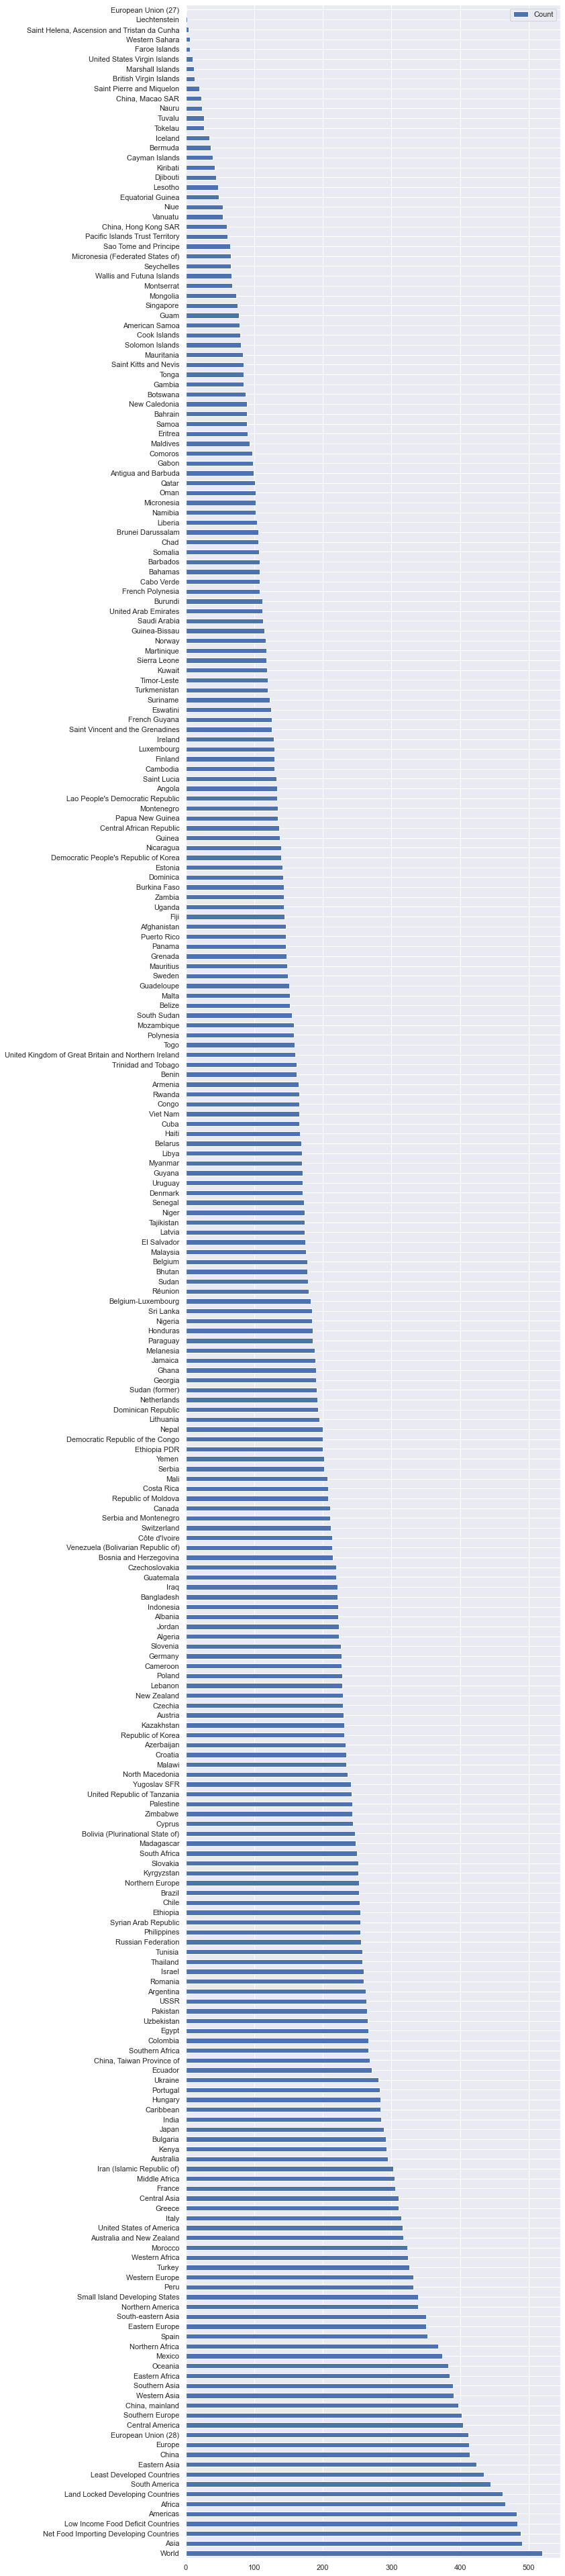

In [29]:
plt.figure(figsize=(10,20))
# sns.boxplot(raw['Area'].value_counts())

locationCounts = pd.DataFrame(raw['Area'].value_counts())
locationCounts.columns = ['Count']
locationCounts.reset_index()
locationCounts.plot.barh(figsize=(10,70))
# sns.boxplot(x=locationCounts.index, y='Count', width=0.15, data=locationCounts)    

Area           Item  Year       Price      continent
1457        Russian Federation            Tea  2017 72627.40000         Europe
1458        Russian Federation            Tea  2018 67614.80000         Europe
1459        Russian Federation            Tea  2019 64362.30000         Europe
1773  United States of America  Coffee, green  2019 44313.00000  North America
1772  United States of America  Coffee, green  2018 42770.00000  North America
...                        ...            ...   ...         ...            ...
524                    Ecuador  Coffee, green  1996    24.70000  South America
520                    Ecuador  Coffee, green  1994    14.20000  South America
518                    Ecuador  Coffee, green  1993     8.60000  South America
516                    Ecuador  Coffee, green  1992     5.20000  South America
514                    Ecuador  Coffee, green  1991     4.80000  South America

[1908 rows x 5 columns]

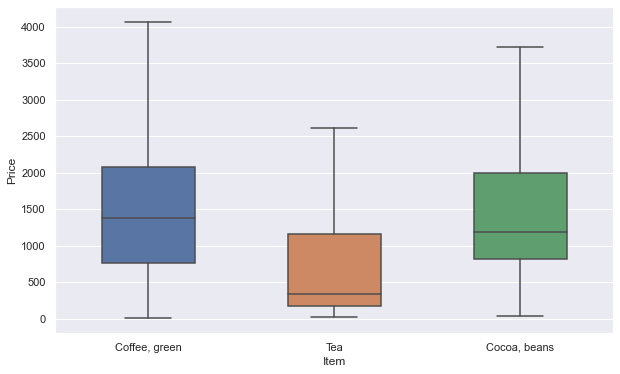

In [30]:
#distribution of prices
plt.figure(figsize=(10,6))
sns.boxplot(y='Price', x='Item',width=0.5, data=caffeinePrices, showfliers=False)
caffeinePrices.sort_values(by='Price', ascending=False)

In [31]:
# view of all areas..
pd.set_option('display.max_rows', 260)
areas.sort_index()

Area
Area Code                                                   
1                                                    Armenia
2                                                Afghanistan
3                                                    Albania
4                                                    Algeria
5                                             American Samoa
7                                                     Angola
8                                        Antigua and Barbuda
9                                                  Argentina
10                                                 Australia
11                                                   Austria
12                                                   Bahamas
13                                                   Bahrain
14                                                  Barbados
15                                        Belgium-Luxembourg
16                                                Bangladesh
17                                                   Bermuda
18                                                    Bhutan
19                          Bolivia (Plurinational State of)
20                                                  Botswana
21                                                    Brazil
23                                                    Belize
25                                           Solomon Islands
26                                         Brunei Darussalam
27                                                  Bulgaria
28                                                   Myanmar
29                                                   Burundi
32                                                  Cameroon
33                                                    Canada
35                                                Cabo Verde
36                                            Cayman Islands
37                                  Central African Republic
38                                                 Sri Lanka
39                                                      Chad
40                                                     Chile
41                                           China, mainland
44                                                  Colombia
45                                                   Comoros
46                                                     Congo
47                                              Cook Islands
48                                                Costa Rica
49                                                      Cuba
50                                                    Cyprus
51                                            Czechoslovakia
52                                                Azerbaijan
53                                                     Benin
54                                                   Denmark
55                                                  Dominica
56                                        Dominican Republic
57                                                   Belarus
58                                                   Ecuador
59                                                     Egypt
60                                               El Salvador
61                                         Equatorial Guinea
62                                              Ethiopia PDR
63                                                   Estonia
64                                             Faroe Islands
66                                                      Fiji
67                                                   Finland
68                                                    France
69                                             French Guyana
70                                          French Polynesia
72                                                  Djibouti
73                                                   Georgia
74                                                     Gabon
75                            

In [33]:
world = regionalDict['World']
worldProductionTotal = world[world['Element'] == 'Production'].loc[:, '1961':]
worldYieldTotal = world[world['Element'] == 'Yield'].loc[:, '1961':]
worldAreaHarvested = world[world['Element'] == 'Area harvested'].loc[:, '1961':]

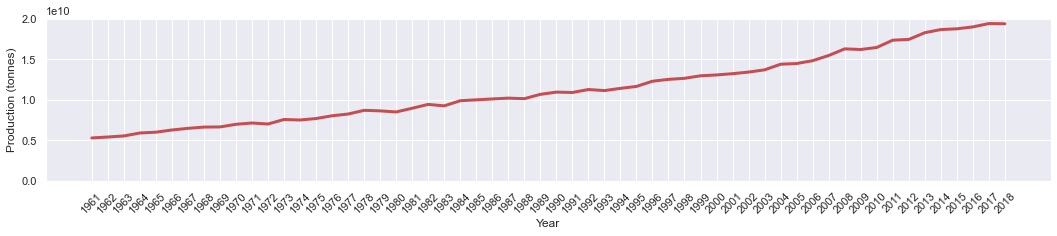

In [34]:
plt.xticks(rotation=45)
plt.plot(worldProductionTotal.sum(), label='Production', color='r', linewidth=3, markersize=12)
plt.xlabel('Year')
plt.ylabel('Production (tonnes)')
plt.ylim(0)
plt.show()

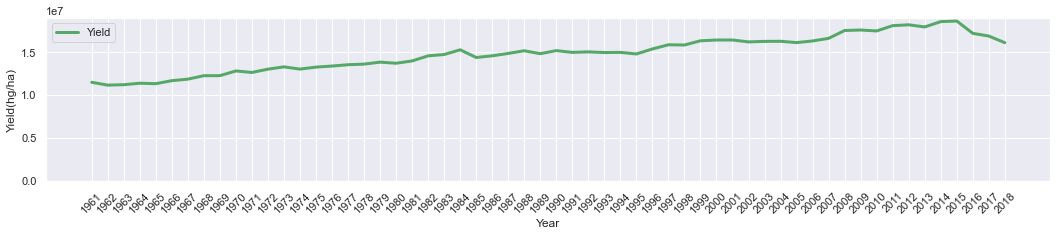

In [35]:
plt.xticks(rotation=45)
plt.plot(worldYieldTotal.sum(), label='Yield', color='g', linewidth=3, markersize=12)
plt.xlabel('Year')
plt.ylabel('Yield(hg/ha)')
plt.legend()
plt.ylim(0)
plt.show()

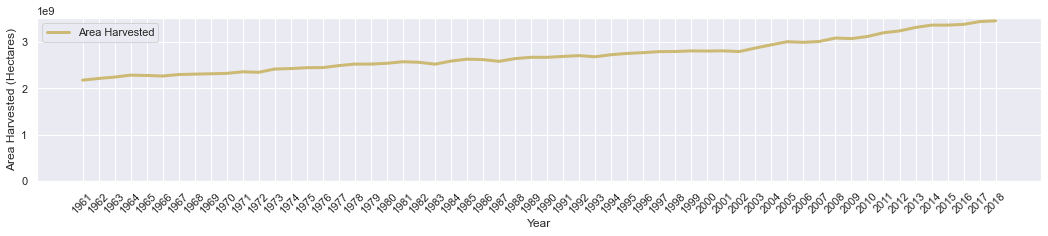

In [36]:
plt.xticks(rotation=45)
plt.plot(worldAreaHarvested.sum(), label='Area Harvested', color='y', linewidth=3, markersize=12)
plt.xlabel('Year')
plt.ylabel('Area Harvested (Hectares)')
plt.legend()
plt.ylim(0)
plt.show()

The best performing on average seems to be: Cereals, Total


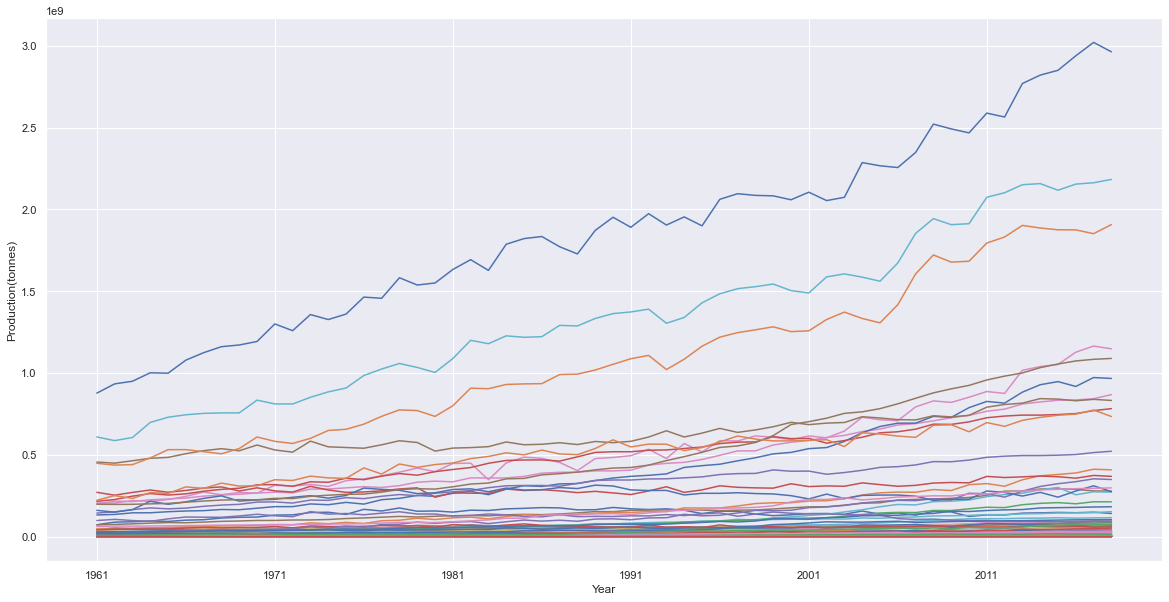

In [37]:
worldProduction = world[world['Element'] == 'Production']
worldProductionByItem = worldProduction.groupby('Item').sum().loc[:, '1961':]
# worldProductionByItem.iloc[0].plot()
for i in range(1, len(worldProductionByItem)):
    ax = worldProductionByItem.iloc[i].plot(figsize=(20, 10), label=worldProductionByItem.index[i])
    ax.set_xlabel('Year')
    ax.set_ylabel('Production(tonnes)')
print('The best performing on average seems to be: ' + worldProductionByItem.mean(axis=1).idxmax())
plt.grid(True)

## What is the correlation between climate change (surface temperatures in this case) and crop production in countries that rank in the top 3 in Climate Risk Indexes? 

These are the countries with notably high climate risk indexes and we will be observing the ones at the top.
###   
<div>
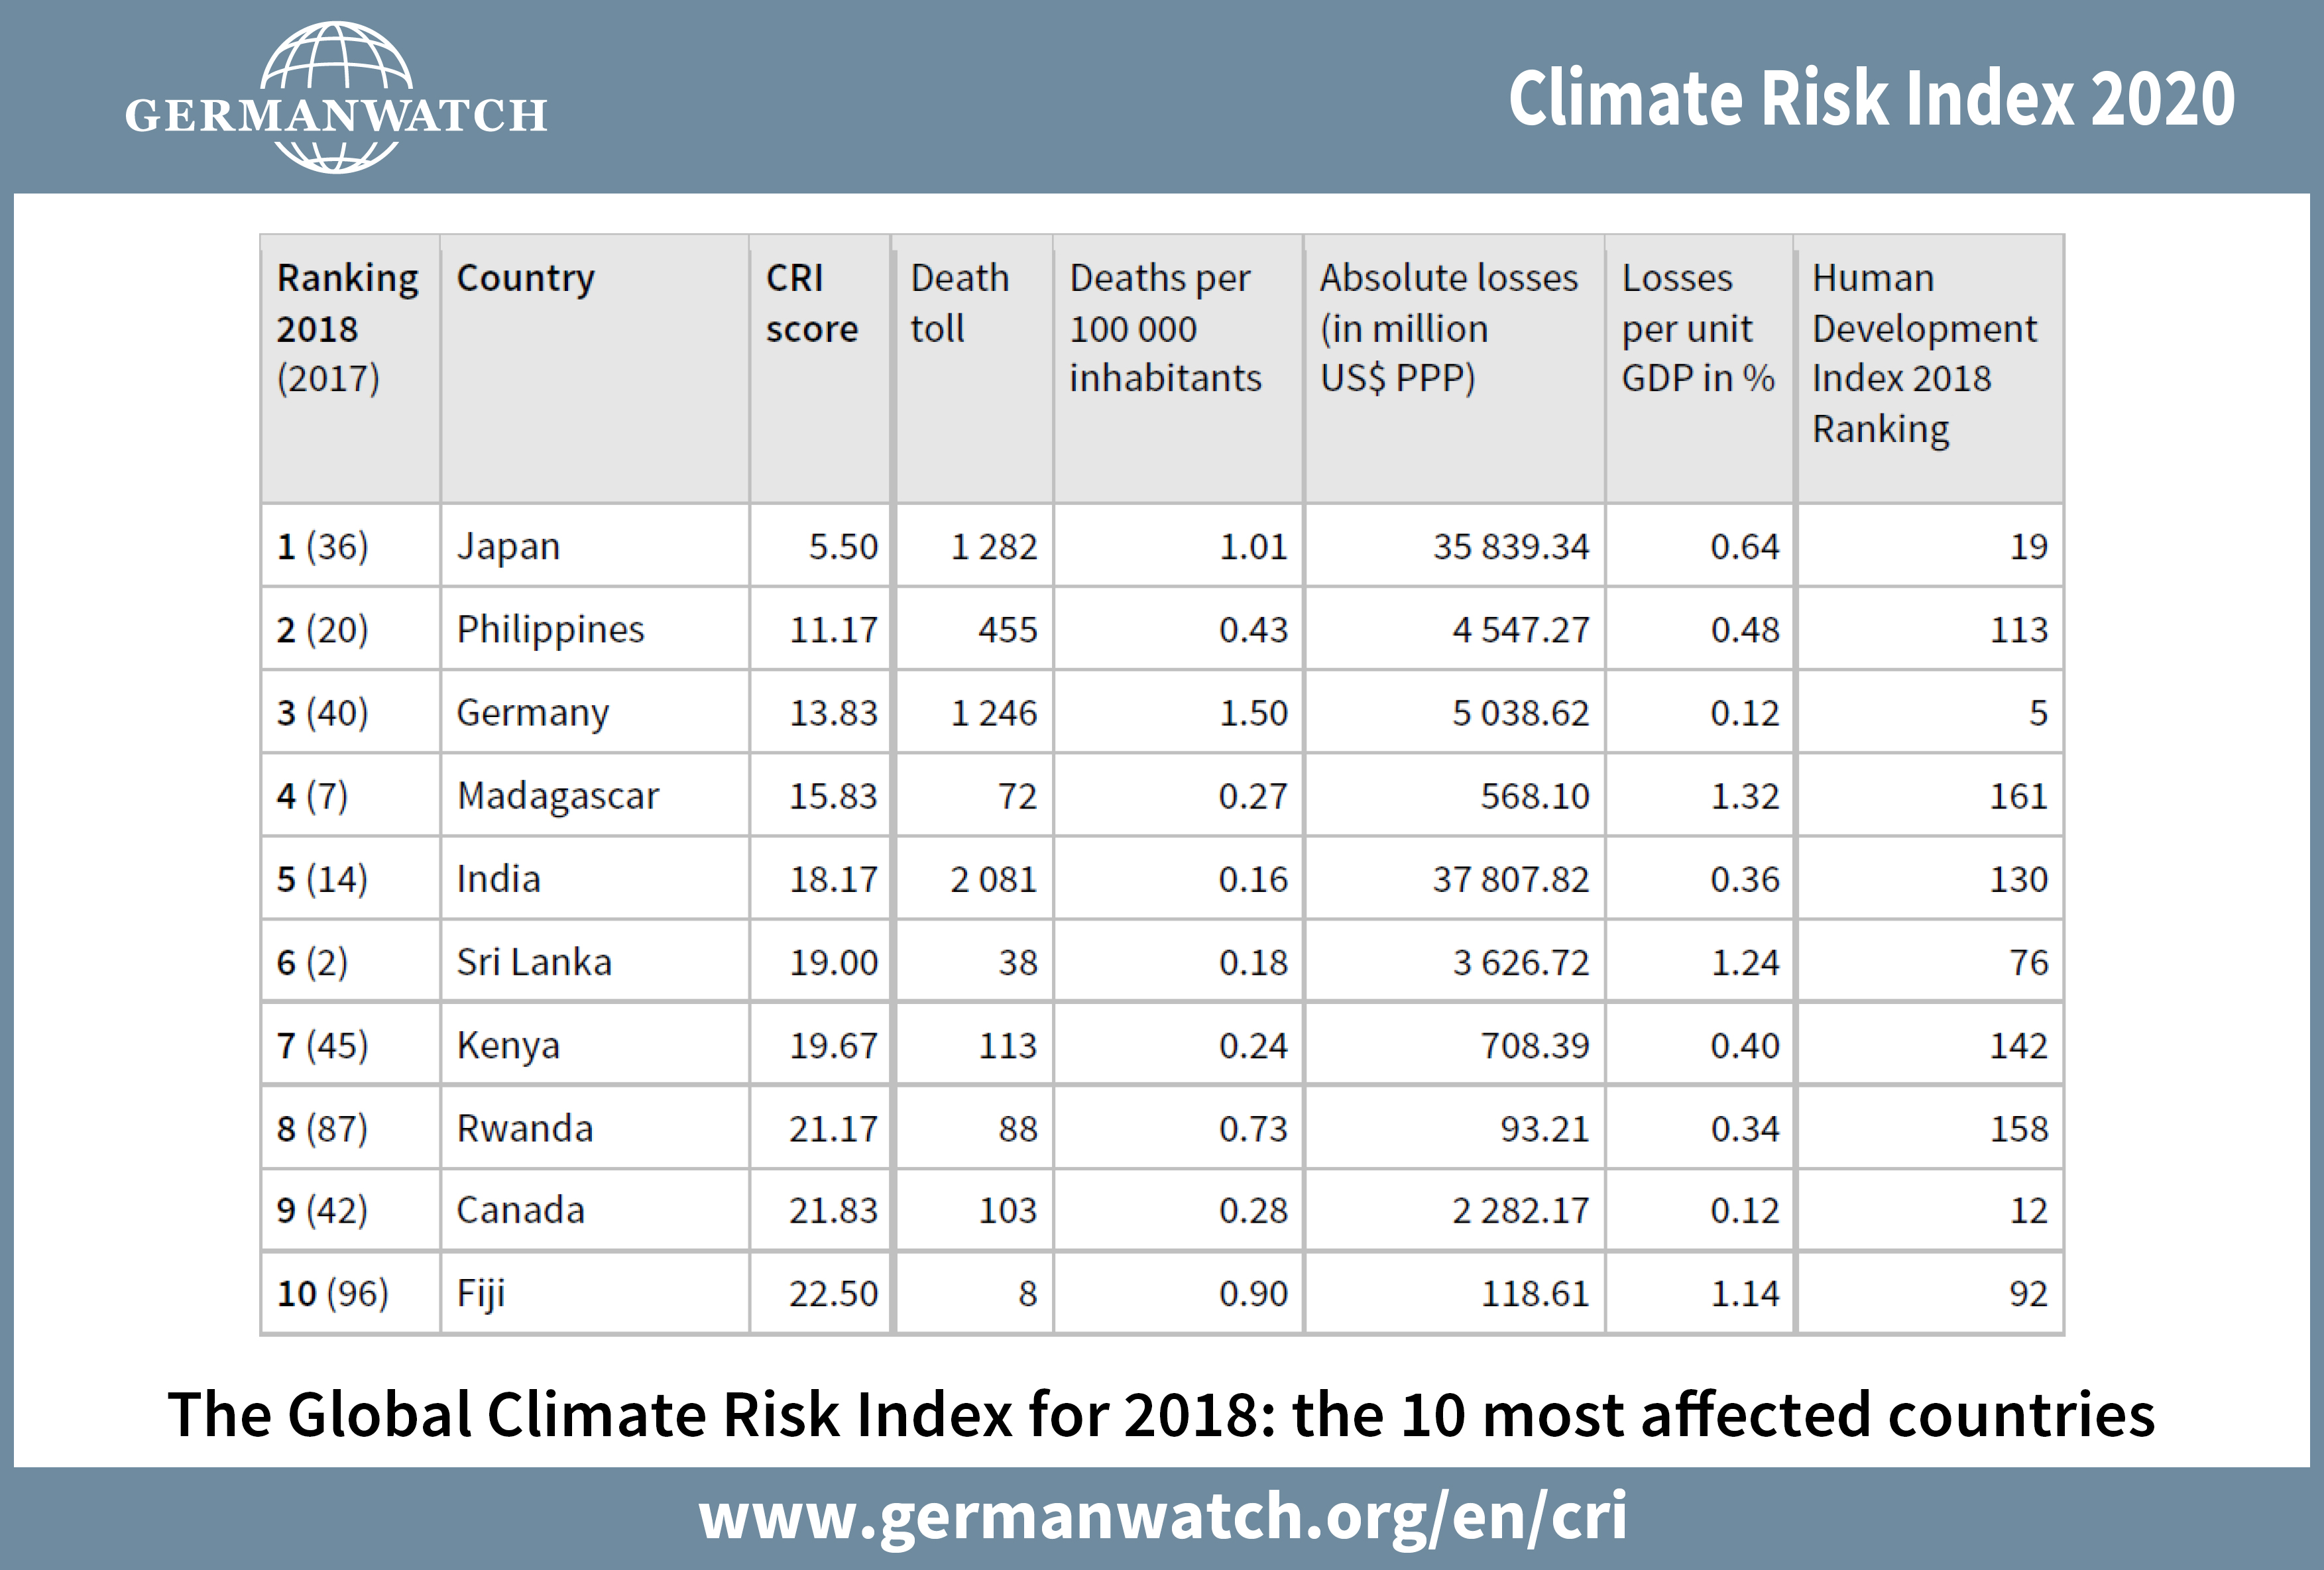
</div>

### In countries with a High Climate Risk Index, what is the correlation and does correlation actually imply causation?

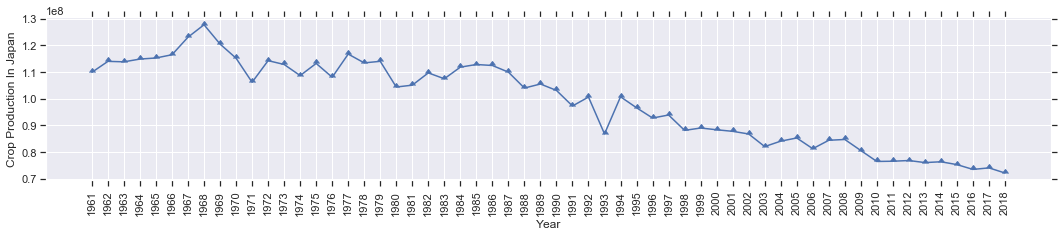

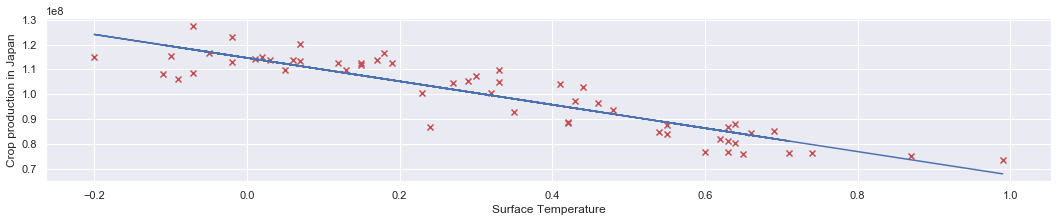

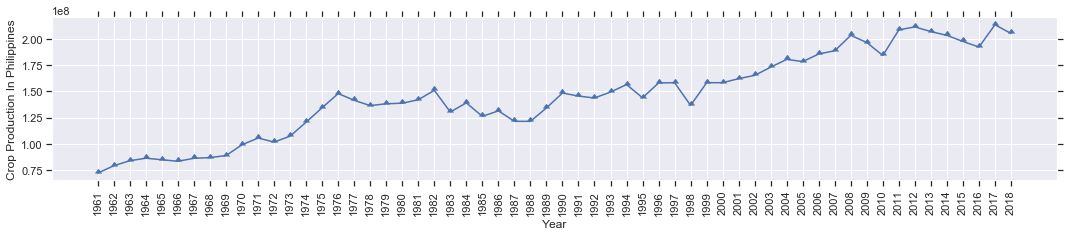

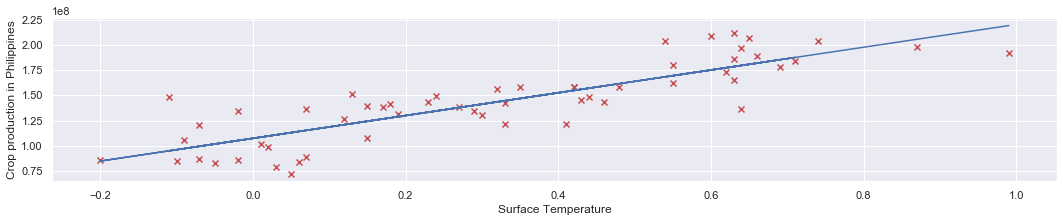

In [98]:
climate = pd.read_csv('climate/annual_csv.csv')
surfaceTemp = pd.DataFrame(climate[np.logical_and(climate['Source']=='GISTEMP', climate['Year']>=1961)].sort_values(by=['Year']))
surfaceTemp.rename({"Mean": "SurfaceTemp"}, inplace=True)
surfaceTemp['Year'] = pd.to_numeric(surfaceTemp['Year'])
surfaceTemp.drop(['Source'], axis=1, inplace=True)
surfaceTemp.set_index('Year', inplace=True)

HighCRICountries = ['Japan', 'Philippines']

for country in HighCRICountries:
    AreaAggregated = raw[raw['Area']==country]
    AreaProductionYearly = AreaAggregated[AreaAggregated['Element']=='Production'].loc[:,'1961':].sum()
    plt.plot(AreaProductionYearly, marker=10)
    plt.xlabel('Year')
    plt.ylabel('Crop Production In ' + country)
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', 
    labelbottom='on')
    plt.xticks(rotation=90)
    plt.show()

    areaFormatted = pd.DataFrame()
    count = 0
    for year, value in AreaProductionYearly.iteritems():
        areaFormatted.loc[count, 'Year'] = year
        areaFormatted.loc[count, 'Total'] = value
        count += 1
    areaFormatted['Year'] = pd.to_numeric(areaFormatted['Year'])

    areaMerged = areaFormatted.merge(surfaceTemp, on='Year')
    areaMerged.set_index('Year', inplace=True)

    plt.scatter(areaMerged['Mean'], areaMerged['Total'], marker='x', cmap='viridis_r', color='r')
    plt.xlabel('Surface Temperature')
    plt.ylabel('Crop production in ' + country)

    x = np.array(areaMerged['Mean'])
    y = np.array(areaMerged['Total'])
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)
    plt.show()

For Japan, the overall correlation is negative. But for other countries who have faced the impact of climate change, there is a weak to moderate positive correlation. Because of this, we can perhaps say, that the impact is not too apparent or there are other factors that need to be taken into account (industrial development, nature of crops grown, etc.), geographical position on the map and more.

# Studying Caffeine

1. What are the biggest sources of caffeine?

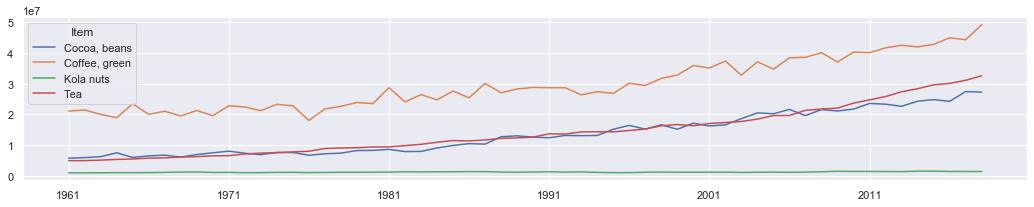

In [99]:
caffeineProduction = raw[raw['Item'].str.contains('Coffee|Tea|Cocoa|Kola')]
caffeineProduction = caffeineProduction[caffeineProduction['Element'] == 'Production']
caffeineProduction.groupby('Item').sum().loc[:,'1961':].T.plot()

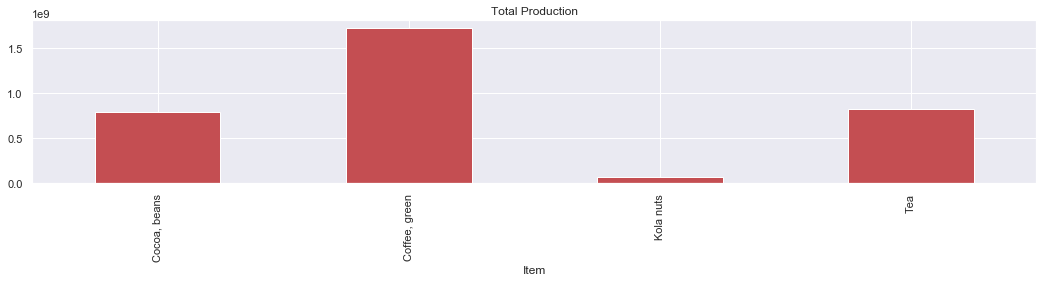

In [100]:
# Total production over the years
caffeineProduction.groupby('Item').sum().loc[:,'1961':].sum(axis=1).plot.bar(color='r')
plt.title('Total Production')
plt.show()

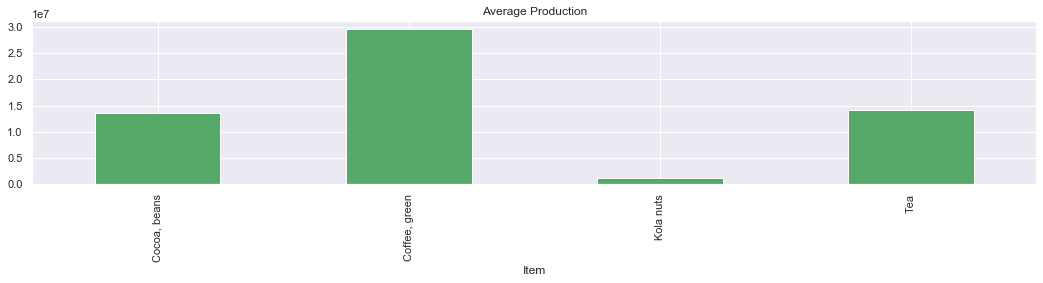

In [101]:
caffeineProduction.groupby('Item').sum().loc[:,'1961':].mean(axis=1).plot.bar(color='g')
plt.title('Average Production')
plt.show()

2. How has caffeine crop production changed over the decades, measured across Asia Pacific/Africa/Latin America and if a trend is observed for one, does that same trend apply for the others?

### Comparing sub-regionally

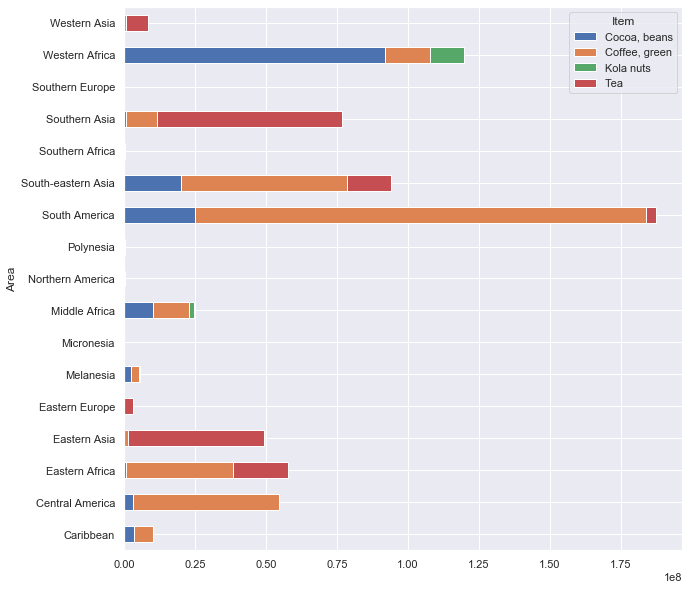

In [102]:
regionsOnly = caffeineProduction[caffeineProduction['Area'].isin(subcon_regions)]
regionsProduction = regionsOnly[regionsOnly['Element'] == 'Production']

# regionsProduction.groupby('Area').sum().mean(axis=1).plot.bar()
regionsProduction.groupby(['Area', 'Item']).sum().sum(axis=1).unstack().plot.barh(stacked=True, figsize=(10,10))

South America appears to be the biggest producer of caffeine-based crops in the world and it's biggest produce is green coffee beans, astronomically higher than any other region in the world.

### Comparing continentally

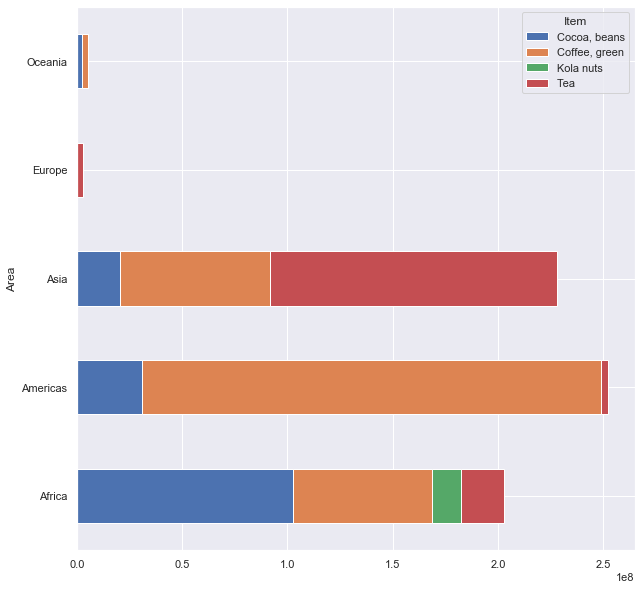

In [103]:
regionsOnly = caffeineProduction[caffeineProduction['Area'].isin(continents)]
regionsProduction = regionsOnly[regionsOnly['Element'] == 'Production']
regionsProduction.groupby(['Area', 'Item']).sum().sum(axis=1).unstack().plot.barh(stacked=True, figsize=(10,10))

Similarly, North and South America cumulatively produce the most caffeine-based crops while Asia comes close. North and South America are the biggest producers of green coffee beans, while Asia produces the most tea leaves and Africa produces the most cocoa beans. The three regions actively grow a different combination of crops and contribute differently to the global market.

## Asia, Africa, Americas (World's Biggest Manufacturers)

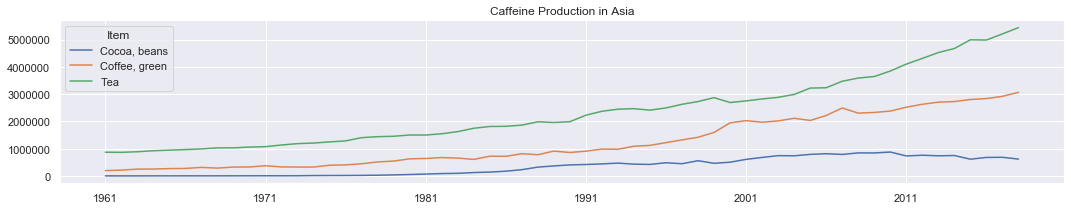

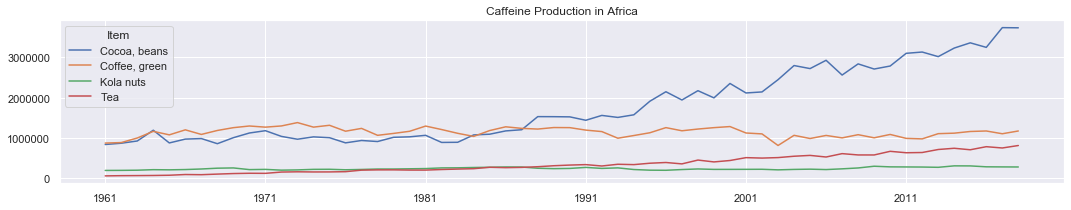

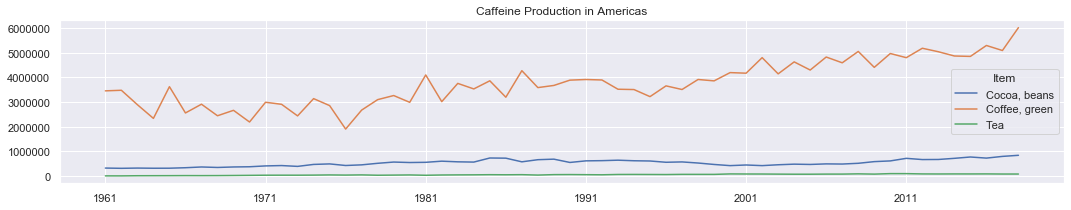

In [104]:
biggestManufacturers = ['Asia', 'Africa', 'Americas']

for continent in biggestManufacturers:
    contProduction = caffeineProduction[caffeineProduction['Area'] == continent].set_index('Item').loc[:, '1961':]
    contProduction.T.plot(title=f'Caffeine Production in {continent}')

### Understanding the trends
The takeaways from the depictions:

1) Global Production of Caffeine based crops is on an overall upward trend, even if there are mild fluctuations over the years. This can be attributed to either an increasing population, increasing demand, further cultivation of these crops, higher export rates, etc.

2) The 3 biggest sources of caffeine are cocoa beans, green coffee beans and tea leaves and each of the regions are leaders in each of these. Asia sort of ```specialises```in tea leaves, Africa in cocoa and the Americas in green coffee beans.

3) In proportion, coffee beans production in the Americas is not very stable, with sudden spikes and extreme fluctuations, the pattern being much more noticeable than the other 2 continents.

4) Asia's growth, at first sight, is the smoothest.

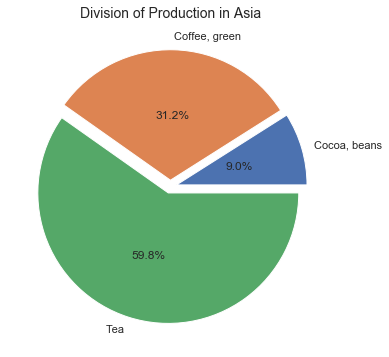

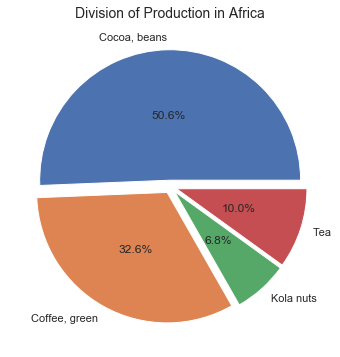

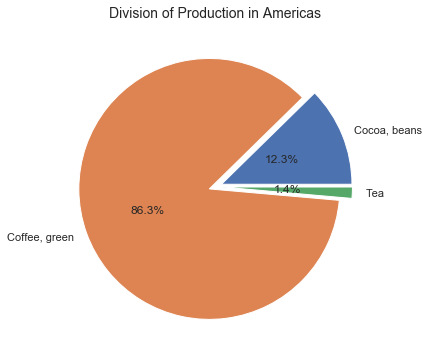

In [105]:
biggestManufacturers = ['Asia', 'Africa', 'Americas']

for continent in biggestManufacturers:
    contProduction = caffeineProduction[caffeineProduction['Area'] == continent].set_index('Item').loc[:, '1961':]
    contTotals = contProduction.sum(axis=1)
    pie, ax = plt.subplots(figsize=[10,6])
    labels = contTotals.keys()
    plt.pie(x=contTotals, autopct="%.1f%%", explode=[0.05]*len(labels), labels=labels, pctdistance=0.5)
    plt.title(f"Division of Production in {continent}", fontsize=14);

While pie charts aren't a good indication of volume, it does say something about how the market share is split and it reaffirms the points made above.

----------------------------------------------------------------------------------------------------------------------

3. How has the price of caffeine crops changed over the years in these chosen economies and is that attributed to any particular factor (a sudden introduction of an alternative, etc.)? Is there an effect of production levels on the prices of caffeine-based crops (helps to weigh their value)? When production increases or decreases, what generally happens?

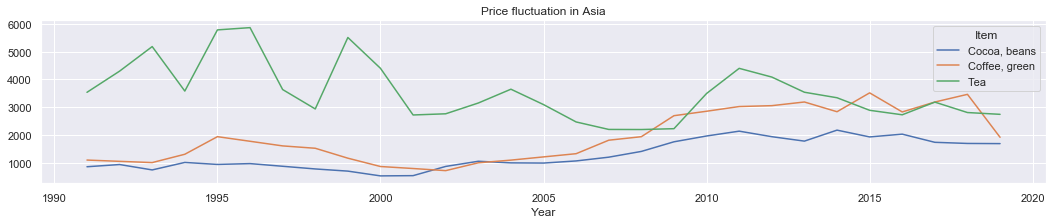

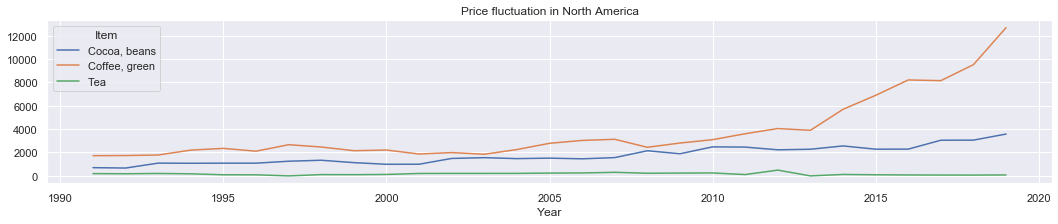

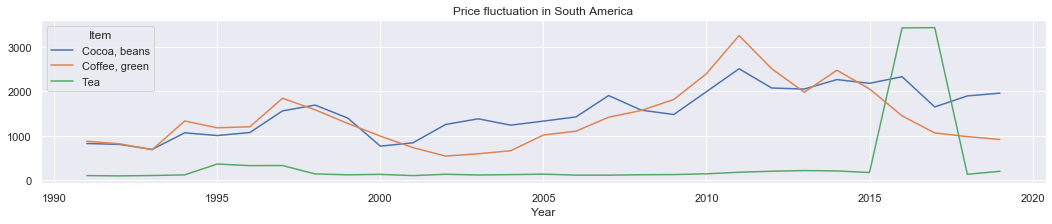

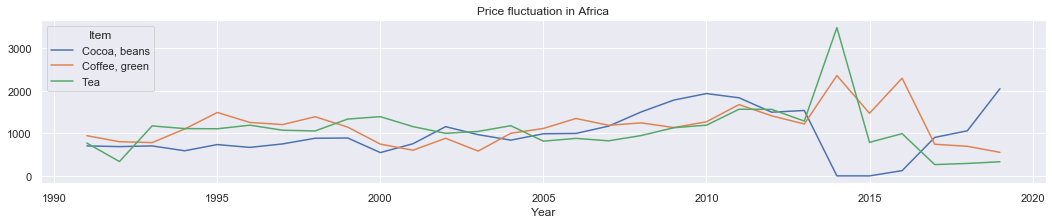

In [106]:
biggestManufacturers = ['Asia', 'North America', 'South America', 'Africa']
caffeinePrices.fillna(0, inplace=True)
for continent in biggestManufacturers:
    caffeinePriceRange = caffeinePrices[caffeinePrices['continent'] == continent].set_index('Year')
    continentGrouped = caffeinePriceRange.groupby(['Year','Item'])['Price'].mean().unstack()
    continentGrouped.fillna(0, inplace=True)
    continentGrouped.plot(title=f'Price fluctuation in {continent}')

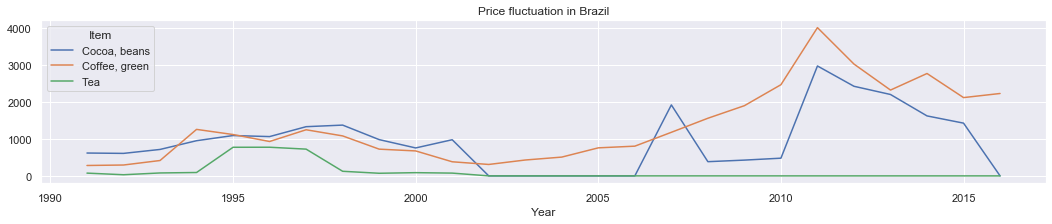

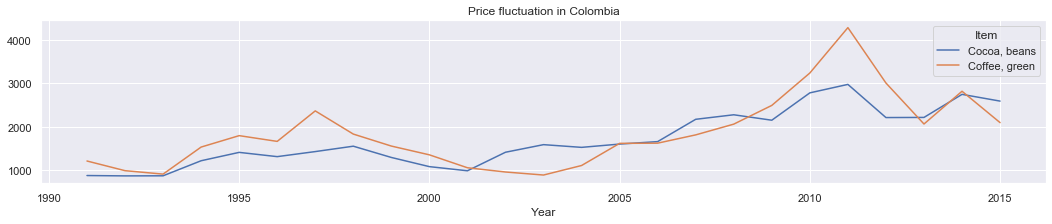

In [107]:
countries = ['Brazil', 'Colombia']
# print(caffeinePrices['Area'].value_counts())
for country in countries:
    caffeinePriceRange = caffeinePrices[caffeinePrices['Area'] == country].set_index('Year')
    countryGrouped = caffeinePriceRange.groupby(['Year','Item'])['Price'].mean().unstack()
    countryGrouped.fillna(0, inplace=True)
    countryGrouped.plot(title=f'Price fluctuation in {country}')

In [108]:
caffeineSorted = caffeineProduction.groupby(['Item']).mean().T.reset_index()
priceMerge = caffeinePrices.drop(['continent', 'Item Code', 'Area'], axis=1)

caffeineSorted.columns = ['Year', 'Cocoa, beans', 'Coffee, green', 'Kola nuts', 'Tea']
caffeineSorted['Year']
caffeineSorted = pd.melt(caffeineSorted, id_vars=['Year'], value_vars=caffeineSorted.columns[1:], var_name='Item', value_name='Production')
caffeineSorted.Year = caffeineSorted.Year.astype(str)
priceMerge.Year = priceMerge.Year.astype(str)
merged = caffeineSorted.merge(priceMerge, on=['Year', 'Item'])

merged.set_index('Year')
# sns.regplot(x='Production', y='Value',data=merged)

Item   Production       Price
Year                                       
1991  Cocoa, beans 141940.19540   823.60000
1991  Cocoa, beans 141940.19540   619.70000
1991  Cocoa, beans 141940.19540   709.00000
1991  Cocoa, beans 141940.19540   870.10000
1991  Cocoa, beans 141940.19540   311.90000
...            ...          ...         ...
2018           Tea 423099.68831 67614.80000
2018           Tea 423099.68831   195.60000
2018           Tea 423099.68831   554.00000
2018           Tea 423099.68831   480.50000
2018           Tea 423099.68831   377.20000

[1871 rows x 3 columns]

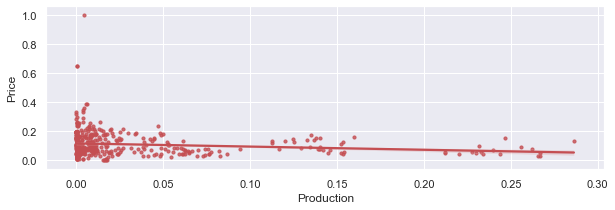

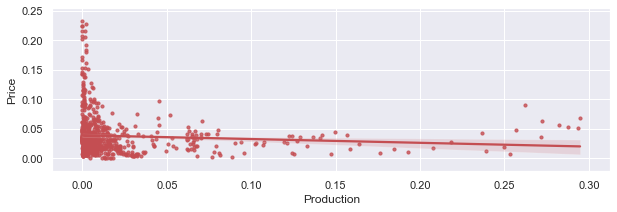

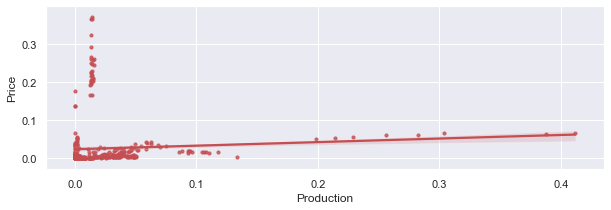

In [109]:
#Looking at coffee, green beans
def prodPriceCorr(item):
    greencoffeeprices = caffeinePrices.copy()[caffeinePrices['Item'] == item]
    greencoffeeproduction = caffeineProduction[caffeineProduction['Item'] == item]
    greencoffeeproduction = greencoffeeproduction.melt(id_vars=['Area'], value_vars=greencoffeeproduction.columns[3:],
                              var_name='Year', value_name='Production')
    greencoffeeprices.drop(columns=['Item', 'Item Code', 'continent'], inplace=True)
    greencoffeeprices['Year'] = greencoffeeprices['Year'].astype(str)
    greencoffeeproduction['Year'] = greencoffeeproduction['Year'].astype(str)
    
    greencoffeeproduction[['Production']] = greencoffeeproduction[['Production']].apply(lambda x:(x-x.min()) / (x.max()-x.min()))
    greencoffeeprices[['Price']] = greencoffeeprices[['Price']].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

    merged = greencoffeeproduction.merge(greencoffeeprices, on=['Area', 'Year'])
    merged.sort_values(by='Production')

    plt.figure(figsize=(10,3))
    sns.regplot(x='Production', y='Price', data=merged, color='r',scatter_kws={"s": 10})
    
caffeineItems = ['Cocoa, beans', 'Coffee, green', 'Tea']
for item in caffeineItems:
    prodPriceCorr(item)
    
    

4. In 1971 and other key dates in the growth of Starbucks, an international coffee beverage company. Were there any noticeable trends in global or regional coffee production near this time period?

In [110]:
caffeineYield = raw[raw['Item'].str.contains('Coffee|Tea|Cocoa|Kola')]
caffeineYield = caffeineYield[caffeineYield['Element'] == 'Yield']

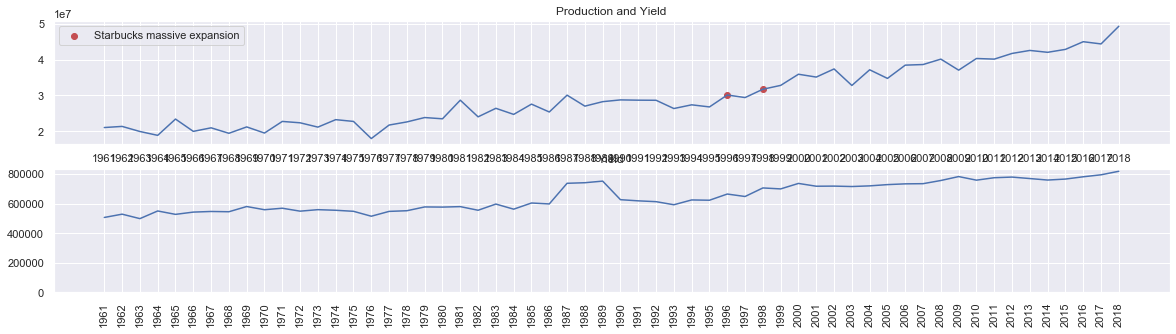

In [111]:
totalProd = caffeineProduction[caffeineProduction['Item'].str.contains('Coffee')].groupby('Item').sum().loc[:,'1961':].sum()
totalYield = caffeineYield[caffeineYield['Item'].str.contains('Coffee')].groupby('Item').sum().loc[:,'1961':].sum()
# plot.set_ylim(ymin=0)

fig, axes = plt.subplots(2, 1, figsize=(20, 5))
plt.xticks(rotation=90)
axes[0].plot(totalProd)
axes[0].set_title('Production and Yield')
axes[1].plot(totalYield)
axes[1].set_title('Yield')
# plt.xticks(rotation=90)
plt.ylim(0)
axes[0].scatter(['1996', '1998'], [totalProd['1996'], totalProd['1998']], marker='o', color='r', label='Starbucks massive expansion')
axes[0].legend(loc='upper left')

From the starbucks website:
```    1998
    Extends the Starbucks brand into grocery channels across the U.S.
    Opens in underserved neighborhoods through joint-venture partnership with Magic Johnson.
    Launches Starbucks.com.
    Establishes the CUP Fund emergency financial assistance fund for partners.
    Opens stores in: England, Malaysia, New Zealand, Taiwan and Thailand.
    Total stores: 1,886
```
So this happened in 2003, hence the drop there. 
https://www.nytimes.com/2003/11/25/business/difficult-times-for-coffee-industry.html

In recent years, the climb has been phenomenal, which means that it is rather promising. Other economic sources also confirm this.

## Data Modeling

The factors that impact crop growth are mainly rainfall and temperature. We have this data, so is it possible to train a regression model for future predictions? Let's see.

## Worldwide Correlation (just as an experiment)

In [112]:

productionRainfallTemp = pd.merge(rawMeltedProduction, rainfallAndTemperatures, on=["Year", "Area"], how='inner')
# productionRainfallTemp.drop(columns=['index'], inplace=True)

In [113]:
rainfallAndTemperatures

Year         Area  Rainfall - (MM)  Temperature - (Celsius)
0     1991  Afghanistan        435.44990                 12.89449
1     1991      Albania        917.86880                 11.03765
2     1991      Algeria         88.13276                 22.51346
3     1991      Andorra        757.11630                 11.18815
4     1991       Angola       1017.98660                 21.71688
...    ...          ...              ...                      ...
5065  2016    Venezuela       1844.70330                 26.47820
5066  2016      Vietnam       1988.86180                 25.07316
5067  2016        Yemen        171.48137                 24.22120
5068  2016       Zambia        803.47810                 22.73705
5069  2016     Zimbabwe        455.13295                 22.31017

[5070 rows x 4 columns]

In [114]:
if('index' in productionRainfallTemp.columns):
    productionRainfallTemp.drop(columns=['index'], inplace=True)
if('level_0' in productionRainfallTemp.columns):
    productionRainfallTemp.drop(columns=['level_0'], inplace=True)

[Text(0, 0.5, 'Production'),
 Text(0, 1.5, 'Rainfall - (MM)'),
 Text(0, 2.5, 'Temperature - (Celsius)')]

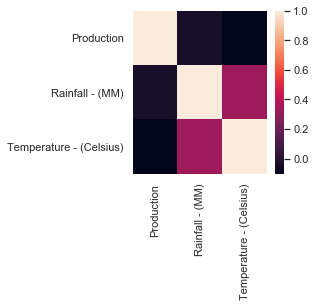

In [115]:
plt.figure(figsize=(3,3))
productionRainfallWorld = sns.heatmap(productionRainfallTemp.corr())
productionRainfallWorld.set_yticklabels(productionRainfallWorld.get_xticklabels(), rotation=0) 

In [116]:
productionRainfallTempYield = pd.merge(rawMeltedYield, rainfallAndTemperatures, on=["Year", "Area"], how='inner')

In [117]:
if('index' in productionRainfallTempYield.columns):
    productionRainfallTempYield.drop(columns=['index'], inplace=True)
if('level_0' in productionRainfallTempYield.columns):
    productionRainfallTempYield.drop(columns=['level_0'], inplace=True)

Yield  Rainfall - (MM)  Temperature - (Celsius)
Yield                    1.00000         -0.07572                 -0.28008
Rainfall - (MM)         -0.07572          1.00000                  0.34299
Temperature - (Celsius) -0.28008          0.34299                  1.00000

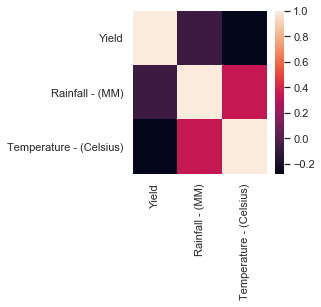

In [118]:
plt.figure(figsize=(3,3))
sns.heatmap(productionRainfallTempYield.corr())
productionRainfallTempYield.corr()

## Per Country Correlations

### Crops Overall

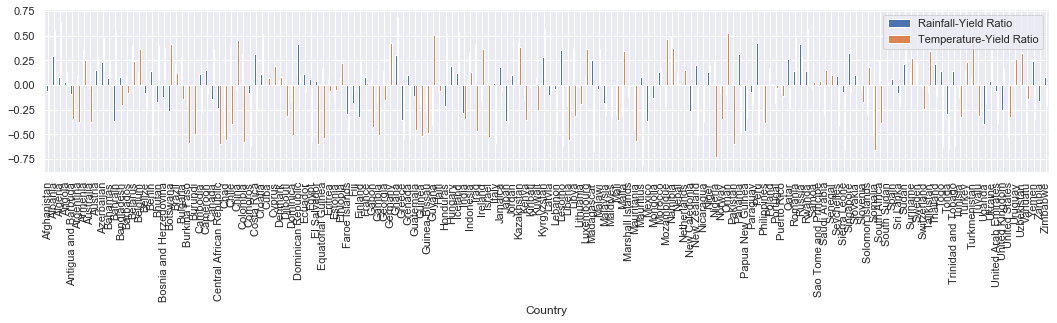

In [217]:
countriesOfInterest = rawMeltedYield['Area'].unique()
countriesMeetingThreshold = []
tempCorr = pd.DataFrame()

for country in countriesOfInterest:
    countryyield = rawMeltedYield[rawMeltedYield['Area'] == country]
    countryclimate = rainAndTempNormalized[rainAndTempNormalized['Area'] == country]
    countrymerged = pd.merge(countryyield, countryclimate, on=["Year", "Area"], how='inner')
    countrymerged.drop(columns=['index'], inplace=True)
    corr = countrymerged.corr()
#     corr.drop(columns=['index'], inplace=True)
    tempCorr = corr
    countriesMeetingThreshold.append([country, corr.iloc[1,0], corr.iloc[2,0]])    

countriesMeetingThreshold = pd.DataFrame(countriesMeetingThreshold, columns=['Country', 'Rainfall-Yield Ratio', 'Temperature-Yield Ratio'])
countriesMeetingThreshold.dropna(inplace=True)
countriesMeetingThreshold.sort_values(by='Temperature-Yield Ratio', ascending=False)
countriesMeetingThreshold.set_index('Country', inplace=True)
countriesMeetingThreshold.plot.bar()

In [218]:
countriesMeetingThreshold.sort_values(by=['Rainfall-Yield Ratio', 'Temperature-Yield Ratio'], ascending=False)

Rainfall-Yield Ratio  Temperature-Yield Ratio
Country                                                                
Namibia                                0.49270                  0.37244
Kazakhstan                             0.43971                  0.38782
Peru                                   0.42835                 -0.49502
Germany                                0.42027                  0.42204
Iraq                                   0.41689                 -0.46855
Russia                                 0.41571                  0.29775
Dominican Republic                     0.41387                  0.11149
Belarus                                0.40211                  0.24037
Chile                                  0.39622                 -0.39461
Libya                                  0.37516                 -0.31450
Lesotho                                0.35862                 -0.61577
Armenia                                0.35416                  0.25461
Indonesia                              0.33420                  0.12954
Singapore                              0.32703                 -0.06616
Colombia                               0.31854                 -0.57499
Costa Rica                             0.31265                 -0.25674
Panama                                 0.31037                 -0.50784
Ghana                                  0.30909                  0.69264
Albania                                0.29859                  0.55724
Kyrgyzstan                             0.28908                  0.56479
Bulgaria                               0.28307                 -0.13845
Qatar                                  0.26255                 -0.23197
Nigeria                                0.26021                 -0.72926
Madagascar                             0.25189                 -0.67801
South Africa                           0.24879                 -0.38320
Yemen                                  0.24045                 -0.34494
Sweden                                 0.23939                  0.00136
Azerbaijan                             0.23466                  0.48083
Uruguay                                0.22658                  0.26141
Brazil                                 0.21677                  0.11867
Thailand                               0.21663                 -0.11894
Sudan                                  0.20937                  0.35399
New Zealand                            0.20336                 -0.51853
Hungary                                0.19305                  0.20810
Poland                                 0.18491                  0.00601
Jamaica                                0.18174                 -0.06504
Equatorial Guinea                      0.17723                 -0.53309
Turkey                                 0.15576                  0.23257
Cameroon                               0.15449                 -0.09480
Austria                                0.15359                  0.29830
Georgia                                0.14685                 -0.15140
Rwanda                                 0.14670                  0.56452
Romania                                0.14618                  0.47554
Togo                                   0.14512                 -0.62447
Trinidad and Tobago                    0.14463                 -0.62209
Benin                                  0.13837                 -0.51214
Suriname                               0.13704                  0.27307
Niger                                  0.13690                  0.20405
Nepal                                  0.12975                  0.00588
Belgium                                0.12875                  0.36424
Morocco                                0.12737                  0.18475
Iceland                                0.12524                  0.53906
Croatia                                0.11164                  0.51360
Cambodia                               0.10854                 -0.

### Only Caffeine-Based Crops

In [121]:
caffeineMelted = raw[np.logical_and(raw['Element'] == 'Yield', raw['Item'].str.contains('Coffee|Tea|Kola'))].melt(id_vars=['Area'], value_vars=raw.columns[3:],
                              var_name='Year', value_name='Production')

In [122]:
caffeineMelted.sort_values(by='Production', ascending=False)

Area  Year   Production
5426                    Mauritius  1988 133333.00000
5228                    Mauritius  1987 133333.00000
5624                    Mauritius  1989 125000.00000
10756  Iran (Islamic Republic of)  2015 105777.00000
7192   Iran (Islamic Republic of)  1997  89276.00000
...                           ...   ...          ...
1042                        Ghana  1966      0.00000
4518              Central America  1983      0.00000
1798                     Cameroon  1970      0.00000
1040                      Georgia  1966      0.00000
2214                     Dominica  1972      0.00000

[11484 rows x 3 columns]

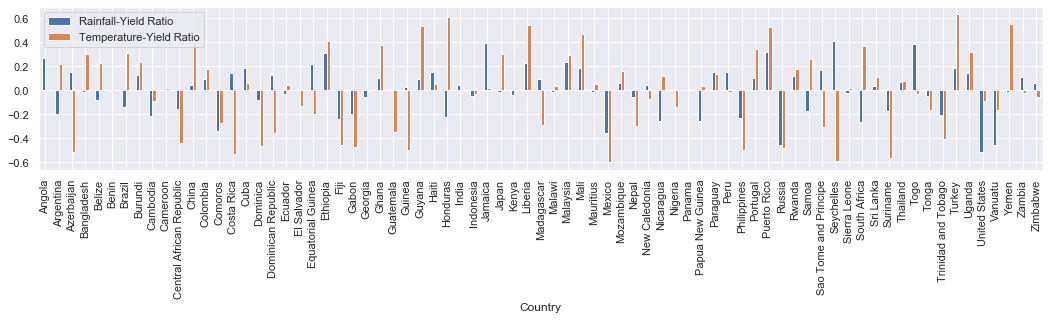

In [211]:
countriesOfInterest = caffeineMelted['Area'].unique()
countriesMeetingThreshold = []
tempCorr = pd.DataFrame()

for country in countriesOfInterest:
    countryyield = caffeineMelted[caffeineMelted['Area'] == country]
    countryclimate = rainAndTempNormalized[rainAndTempNormalized['Area'] == country]
    countrymerged = pd.merge(countryyield, countryclimate, on=["Year", "Area"], how='inner')
    countrymerged.drop(columns=['index'], inplace=True)
    corr = countrymerged.corr()
    tempCorr = corr
    countriesMeetingThreshold.append([country, corr.iloc[1,0], corr.iloc[2,0]])    

countriesMeetingThreshold = pd.DataFrame(countriesMeetingThreshold, columns=['Country', 'Rainfall-Yield Ratio', 'Temperature-Yield Ratio'])
countriesMeetingThreshold.dropna(inplace=True)
countriesMeetingThreshold.sort_values(by='Temperature-Yield Ratio', ascending=False)
countriesMeetingThreshold.set_index('Country', inplace=True)
countriesMeetingThreshold.plot.bar()

In [212]:
countriesMeetingThreshold.sort_values(by='Rainfall-Yield Ratio')

Rainfall-Yield Ratio  Temperature-Yield Ratio
Country                                                                
United States                         -0.51045                 -0.08595
Russia                                -0.45954                 -0.48059
Vanuatu                               -0.45426                 -0.16472
Mexico                                -0.35643                 -0.60151
Comoros                               -0.33641                 -0.27457
South Africa                          -0.26822                  0.36911
Nicaragua                             -0.25765                  0.11504
Papua New Guinea                      -0.25327                  0.03749
Fiji                                  -0.24278                 -0.45367
Philippines                           -0.22951                 -0.49731
Honduras                              -0.22056                  0.61272
Cambodia                              -0.21825                 -0.09161
Trinidad and Tobago                   -0.20650                 -0.40252
Gabon                                 -0.19758                 -0.46907
Argentina                             -0.19656                  0.21809
Samoa                                 -0.17316                  0.26113
Suriname                              -0.17233                 -0.56260
Central African Republic              -0.16002                 -0.43685
Brazil                                -0.14140                  0.31226
Dominica                              -0.08474                 -0.46468
Belize                                -0.07813                  0.22611
Georgia                               -0.05956                 -0.00825
Nepal                                 -0.05740                 -0.29451
Tonga                                 -0.05180                 -0.16822
Indonesia                             -0.04488                 -0.03466
Kenya                                 -0.03610                 -0.00997
Ecuador                               -0.03320                  0.04134
Sierra Leone                          -0.02050                  0.01673
Bangladesh                            -0.01644                  0.30479
Japan                                 -0.01520                  0.29965
Mauritius                             -0.01227                  0.05089
Malawi                                -0.01113                  0.03282
Yemen                                 -0.01083                  0.54960
Benin                                 -0.00873                  0.00096
Cameroon                              -0.00109                  0.01993
Panama                                 0.00025                  0.01404
Guatemala                              0.00660                 -0.35149
El Salvador                            0.00931                 -0.12800
Nigeria                                0.01035                 -0.14216
Guinea                                 0.03065                 -0.49945
Sri Lanka                              0.03804                  0.11342
New Caledonia                          0.03932                 -0.07321
China                                  0.04222                  0.39540
India                                  0.04372                  0.00440
Mozambique                             0.05927                  0.16204
Zimbabwe                               0.06260                 -0.05778
Thailand                               0.06490                  0.07381
Colombia                               0.09259                  0.17873
Guyana                                 0.09369                  0.53216
Madagascar                             0.09411                 -0.28976
Portugal                               0.10099                  0.34445
Ghana                                  0.10476                  0.37685
Zambia                                 0.10963                 -0.02243
Rwanda                                 0.11460                  0.

## Linear Regression

In [224]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [225]:
for country in ['Namibia', 'Russia', 'Gambia', 'Germany', 'India']:
    countryyield = rawMeltedYield[rawMeltedYield['Area'] == country]
    countryclimate = rainAndTempNormalized[rainAndTempNormalized['Area'] == country]
    countrymerged = pd.merge(countryyield, countryclimate, on=["Year", "Area"], how='inner')

    countrymerged['Year'] = countrymerged['Year'].astype(int)
    countrymerged['Year']
    y = countrymerged['Yield'].values
    X = countrymerged.drop(['Year', 'Area', 'Yield'], axis=1).values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

    reg_test = LinearRegression()
    reg_test.fit(X_train, y_train)

    y_pred = reg_test.predict(X_test)

#     print(accuracy_score(y_test, y_pred))
    print("R^2: {} for {}".format(reg_test.score(X_test, y_test), country))
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error: {} for {}".format(rmse, country))

R^2: 0.3907904679620515 for Namibia
Root Mean Squared Error: 7.639855564661036e-06 for Namibia
R^2: 0.04187549612333441 for Russia
Root Mean Squared Error: 6.768796690106817e-06 for Russia
R^2: 0.7368741459204748 for Gambia
Root Mean Squared Error: 3.508594967644424e-07 for Gambia
R^2: 0.28418994035358613 for Germany
Root Mean Squared Error: 4.950813704902943e-06 for Germany
R^2: 0.4428360399889797 for India
Root Mean Squared Error: 1.866786555710866e-06 for India


## Polynomial Regression

In [223]:
for country in ['Namibia', 'Russia', 'Gambia', 'Germany', 'India']:
    countryyield = rawMeltedYield[rawMeltedYield['Area'] == country]
    countryclimate = rainAndTempNormalized[rainAndTempNormalized['Area'] == country]
    countrymerged = pd.merge(countryyield, countryclimate, on=["Year", "Area"], how='inner')

    countrymerged['Year'] = countrymerged['Year'].astype(int)
    countrymerged['Year']
    y = countrymerged['Yield'].values
    X = countrymerged.drop(['Year', 'Area', 'Yield'], axis=1).values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

#     reg_test = LinearRegression()
#     reg_test.fit(X_train, y_train)

    y_pred = polyreg_scaled.predict(X_test)

#     print(accuracy_score(y_test, y_pred))
    print("R^2: {} for {}".format(reg_test.score(X_test, y_test), country))
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error: {} for {}".format(rmse, country))



R^2: -2.072837356398896 for Namibia
Root Mean Squared Error: 6.854925534698519e-06 for Namibia
R^2: -0.5147488194773577 for Russia
Root Mean Squared Error: 1.171216964968746e-05 for Russia
R^2: -1793.9727801805855 for Gambia
Root Mean Squared Error: 3.1675134370127005e-06 for Gambia
R^2: -81.47633203676058 for Germany
Root Mean Squared Error: 0.00016554782787102018 for Germany
R^2: 0.4428360399889797 for India
Root Mean Squared Error: 7.86289881820776e-06 for India
